# Домашнее задание по статистическому анализу на python

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statistics

Загрузить датасет по url:


In [64]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
df=pd.read_csv(url)

Более подробно о датасете можно прочитать по [данной ссылке](https://data.world/promptcloud/world-happiness-report-2019) или по [ссылке в kaggle](https://www.kaggle.com/PromptCloudHQ/world-happiness-report-2019)

Context

The World Happiness Report is a landmark survey of the state of global happiness that ranks 156 countries by how happy their citizens perceive themselves to be. This year’s World Happiness Report focuses on happiness and the community: how happiness has evolved over the past dozen years, with a focus on the technologies, social norms, conflicts and government policies that have driven those changes.



*  **Country (region)** Name of the country.
*  **Ladder** Cantril Ladder is a measure of life satisfaction.
*  **SD of Ladder** Standard deviation of the ladder.
*  **Positive affect** Measure of positive emotion.
*  **Negative affect** Measure of negative emotion.
*  **Social support** The extent to which Social support contributed to the calculation of the Happiness Score.
*  **Freedom** The extent to which Freedom contributed to the calculation of the Happiness Score.
*  **Corruption** The extent to which Perception of Corruption contributes to Happiness Score.
*  **Generosity** The extent to which Generosity contributed to the calculation of the Happiness Score.
*  **Log of GDP per capita** The extent to which GDP contributes to the calculation of the Happiness Score.
*  **Healthy life expectancy** The extent to which Life expectancy contributed to the calculation of the Happiness Score.

Посмотреть первые несколько рядов таблицы

In [65]:
df.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


In [67]:
# df.info()

Построить частотный график для двух параметров: Freedom и positive affect. Какое это распределение?

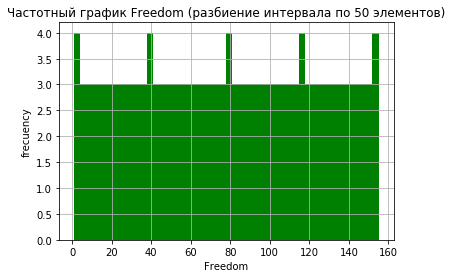

In [69]:
# plt.hist - строит частотный график выборки, разбивая значения выборки на равные интервалы
n, bins, patches = plt.hist(df['Freedom'], 50, facecolor='g')

plt.xlabel('Freedom')
plt.ylabel('frecuency')
plt.title('Частотный график Freedom (разбиение интервала по 50 элементов)')
plt.grid(True)
plt.show()

In [ ]:
# распределение - равномерное

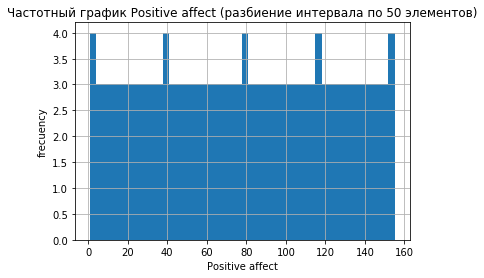

In [82]:
# plt.hist - строит частотный график выборки, разбивая значения выборки на равные интервалы
n, bins, patches = plt.hist(df['Positive affect'], 50)

plt.xlabel('Positive affect')
plt.ylabel('frecuency')
plt.title('Частотный график Positive affect (разбиение интервала по 50 элементов)')
plt.grid(True)
plt.show()

In [83]:
# распределение - равномерное

Найти медиану, моду, математическое ожидание, стандартное отклонение,  дисперсию, минимум и максимум, найти выбросы (если есть), размах для колонки Freedom

In [70]:
# медиана
print('Медиана: ', statistics.median(df['Freedom']))

Медиана:  71.0


In [71]:
# мода
print('Значение моды: ', statistics.mode(df['Freedom']))

StatisticsError: no unique mode; found 156 equally common values

Почему нельзя найти моду?

In [0]:
# Ответ очевиден из сообщения об ошибке при попытке расчета: StatisticsError: no unique mode; found 156 equally common values
# все значения встречаются одинаковое кол-во раз

In [73]:
# математическое ожидание
# print('Математическое ожидание: ', df.Freedom.mean()) # >> 78
print('Математическое ожидание: ', statistics.mean(df['Freedom'])) 

Математическое ожидание:  nan


In [14]:
df[df['Freedom'].isnull()]

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
28,Qatar,29,86,NaN,NaN,NaN,NaN,NaN,NaN,1.0,43.0


In [74]:
filt_df = df[df['Freedom'].notnull()]

In [75]:
print('Математическое ожидание: ', statistics.mean(filt_df['Freedom'])) # nan; >> 78 после искл. строки с пропущенным значением

Математическое ожидание:  78.0


In [76]:
print('Стандартное отклонение: ', "%.2f" % statistics.pstdev(filt_df['Freedom']))

Стандартное отклонение:  44.74


In [77]:
print('Дисперсия: ', "%.2f" % statistics.pvariance(filt_df['Freedom']))

Дисперсия:  2002.00


In [78]:
print('Минимум: ', filt_df.Freedom.min())
print('Максимум: ', filt_df.Freedom.max())

Минимум:  1.0
Максимум:  155.0


In [79]:
# размах
Freedom_range = max(filt_df['Freedom']) - min(filt_df['Freedom'])
print(Freedom_range)

154.0


In [80]:
# выбросы - есть отсутствующие значения для переменных: 
# Positive affect, Negative affect, Social support, Freedom, Corruption, Generosity, Log of GDP per capita, Healthy life
# expectancy
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 11 columns):
Country (region)           156 non-null object
Ladder                     156 non-null int64
SD of Ladder               156 non-null int64
Positive affect            155 non-null float64
Negative affect            155 non-null float64
Social support             155 non-null float64
Freedom                    155 non-null float64
Corruption                 148 non-null float64
Generosity                 155 non-null float64
Log of GDP
per capita      152 non-null float64
Healthy life
expectancy    150 non-null float64
dtypes: float64(8), int64(2), object(1)
memory usage: 13.5+ KB


In [22]:
# количество отсутствующих значений по переменным
df.isnull().sum()

Country (region)            0
Ladder                      0
SD of Ladder                0
Positive affect             1
Negative affect             1
Social support              1
Freedom                     1
Corruption                  8
Generosity                  1
Log of GDP\nper capita      4
Healthy life\nexpectancy    6
dtype: int64

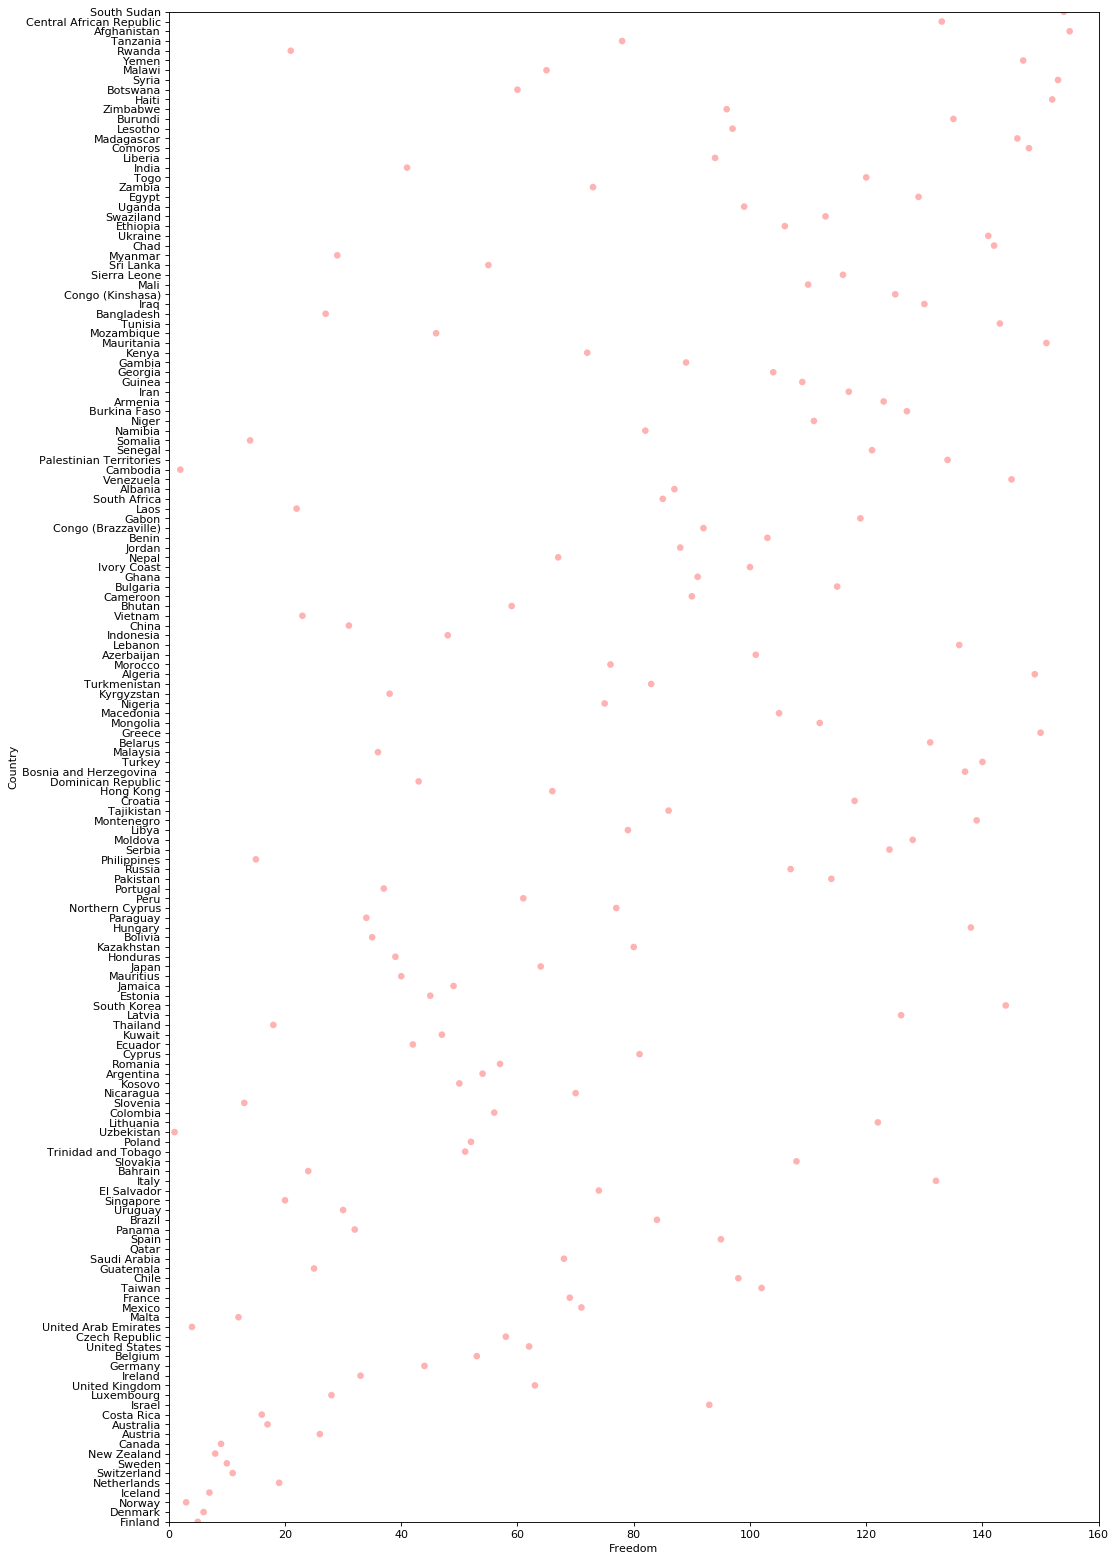

In [87]:
# другой тип выбросов - сильно отличающиеся значения. см. с помощью диаграммы scatter:
Freedom = df['Freedom']
Country = df['Country (region)']

plt.figure(figsize=(15, 25), dpi= 80, facecolor='w', edgecolor='k')
plt.scatter(Freedom, Country, c='red', alpha=0.3, edgecolors='none')

plt.gca().set(xlim=(0.0, 160.0), ylim=(0, 155),
              xlabel='Freedom', ylabel='Country')
plt.show()

In [100]:
# нет выбросов в виде экстремальных значений

Посмотреть корреляцию между Freedom и positive affect (графически и математически). Графически - plt.scatter, математически - посчитать коэффициент Пирсона. О чем говорит знак коэффициента?

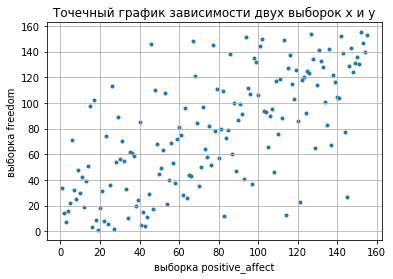

In [88]:
positive_affect = df['Positive affect']
freedom = df['Freedom']
plt.xlabel('выборка positive_affect')
plt.ylabel('выборка freedom')
plt.title('Точечный график зависимости двух выборок x и y')
plt.grid(True)
plt.scatter(positive_affect, freedom, marker='.')

In [89]:
filt_df1 = df[df['Freedom'].notnull() | df['Positive affect'].notnull()]

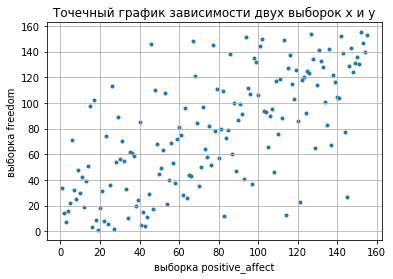

In [90]:
positive_affect = filt_df1['Positive affect']
freedom = filt_df1['Freedom']
plt.xlabel('выборка positive_affect')
plt.ylabel('выборка freedom')
plt.title('Точечный график зависимости двух выборок x и y')
plt.grid(True)
plt.scatter(positive_affect, freedom, marker='.')

In [91]:
# коэффициент Пирсона (чем ближе к 0, тем более независимы переменные):
from scipy.stats import pearsonr
corr, p_value = pearsonr(positive_affect, freedom)
print('Коэффициент корреляции Пирсона:','%.2f' % corr)

Коэффициент корреляции Пирсона: 0.68


In [ ]:
# Между измеениями значений двух переменных -  positive_affect и freedom - существует прямая 
# (положительное значение коэффициента) линейная зависимость. 
# Чем больше значение positive_affect, тем больше значение freedom.
# Теснота этой связи характеризуется значением коэффициента Пирсона (0.68). Это соотвтетствует заметной корреляционной связи,
# согласно таблице Чеддока (https://medstatistic.ru/theory/pirson.html)

Нормализовать данные колонки Freedom (централизация + масштабирование)

In [92]:
freedom_ = filt_df['Freedom']
# freedom_
print(statistics.mean(freedom_))

78.0


In [93]:
freedom_1 = freedom_ - statistics.mean(freedom_)
print(statistics.mean(freedom_1)) 
# freedom_1

0.0


In [94]:
min(freedom_1)

-77.0

In [95]:
max(freedom_1)

77.0

In [96]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))

freedom_2 = min_max_scaler.fit_transform(np.array(freedom_1).reshape(-1, 1))
print(min(freedom_2))
print(max(freedom_2))

[-1.]
[1.]


(array([16., 15., 16., 15., 15., 16., 15., 16., 15., 16.]),
 array([  1. ,  16.4,  31.8,  47.2,  62.6,  78. ,  93.4, 108.8, 124.2,
        139.6, 155. ]),
 <a list of 10 Patch objects>)

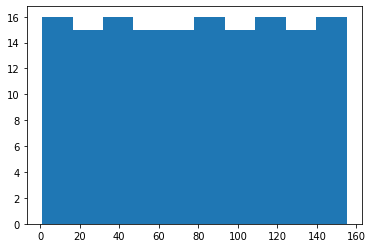

In [97]:
plt.hist(freedom_)

Построить матрицу корреляций для всех колонок таблицы

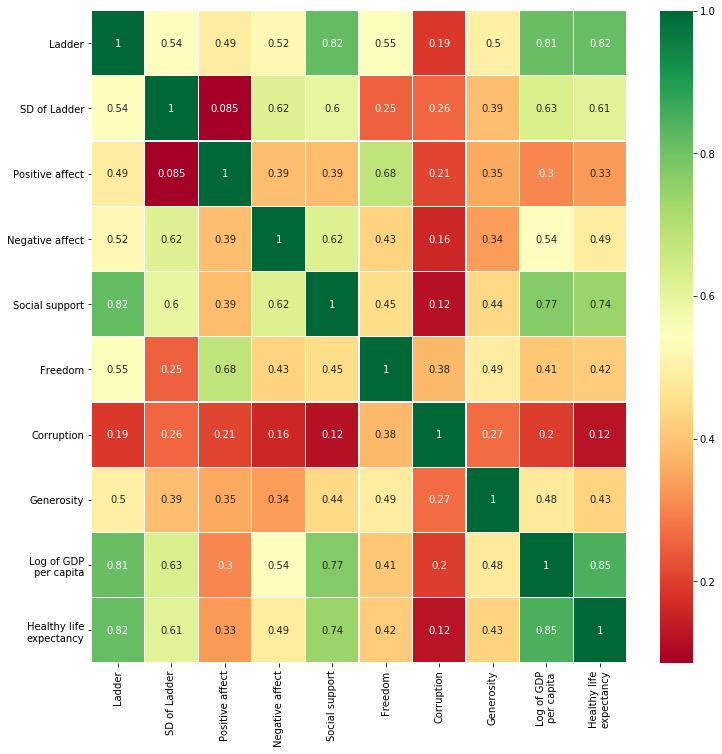

In [98]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->матрица корреляций
# gcf() - получение текущей фигуры
fig=plt.gcf()
# set_size_inches() - установить размер фигуры
fig.set_size_inches(12,12)
plt.show()


В данном датасете некоторые атрибуты значительно коррелируют. Какие? Почему?

In [55]:
# sns_plot = sns.pairplot(
#     df[['Ladder', 'SD of Ladder', 'Positive affect','Negative affect', 'Social support', 'Freedom', 'Corruption', 
#         'Generosity']]) # на основе каких столбцов строим
# sns_plot
# по диагонали - гистограммы, в др. ячейках - как связаны между собой различные признаки
# пользователи и критики сходятся в оценках, как один из выводов

In [0]:
Healthy life expectancy, Log of GDP per capita: 0.85
# ожидаемая продолжительность здоровой жизни и ВВП на душу населения - чем дольше человек здоров, тем дольше (в пределах 
# трудоспособного возраста) он работает и продолжает осуществялть свой вклад в ВВП и наоборот, чем больше показатель ВВП на душу
# населения, тем выше качество жизни и продолжительнее здоровая жизнь

Healthy life expectancy, Ladder: 0.82
# ожидаемая продолжительность здоровой жизни и удовлетворенность жизнью - чем дольше человек здоров, тем больше вероятность 
# быть удовлетворенным жизнью и наоборот, чем больше человек удовлетворен жизнью, тем больше вероятность сохранить здоровье дольше

Social support, Ladder: 0.82
# социальная поддержка (помощь родственников или друзей в случае проблемы) и удовлетворенность жизнью - удовлетворенность жизнью
# выше, если человек может рассчитывать на социальную поддержку и наоборот, чем выше удовлетворенность жизнью, тем больше 
# социальная поддержка

Ladder, Log of GDP per capita: 0.81
# удовлетворенность жизнью и ВВП на душу населения - чем выше удовлетворенность жизнью, в том числе занятостью, тем больше вклад 
# в ВВП и наоборот, чем выше ВВП на душу насления, т.е. благосостояние, тем выше удовлетворенностью жизнью

# Оставшиеся пункты оставлю без комментариев:
Social support, Log of GDP per capita: 0.77
# социальная поддержка и ВВП на душу населения

Healthy life expectancy, Social support: 0.74
# ожидаемая продолжительность здоровой жизни и социальная поддержка


Загрузить таблицу цен на авокадо: 

In [101]:
import io
import requests
url="http://yustiks.ru/avocado.csv"
df=pd.read_csv(url)
df[:3]

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany


Сделать частотный график колонки AveragePrice. Какое это распределение?

In [102]:
df.AveragePrice.mean()

1.4059784097758825

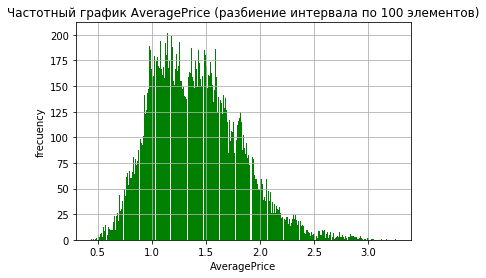

In [103]:
# plt.hist - строит частотный график выборки, разбивая значения выборки на равные интервалы
n, bins, patches = plt.hist(df['AveragePrice'], 300, facecolor='g')

plt.xlabel('AveragePrice')
plt.ylabel('frecuency')
plt.title('Частотный график AveragePrice (разбиение интервала по 100 элементов)')
plt.grid(True)
plt.show()

In [99]:
# распределение - нормальное

Найти корреляцию в следующих колонках:

колонкой 4046, 4225, 4770 и Average Price. Если корелляция есть (обратная или прямая), то какие выводы можно сделать?

In [106]:
filt_df = df[['4046', '4225', '4770','AveragePrice']]
# filt_df.head()

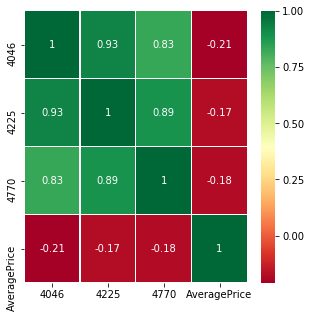

In [140]:
sns.heatmap(filt_df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->матрица корреляций
# gcf() - получение текущей фигуры
fig=plt.gcf()
# set_size_inches() - установить размер фигуры
fig.set_size_inches(5,5)
plt.show()

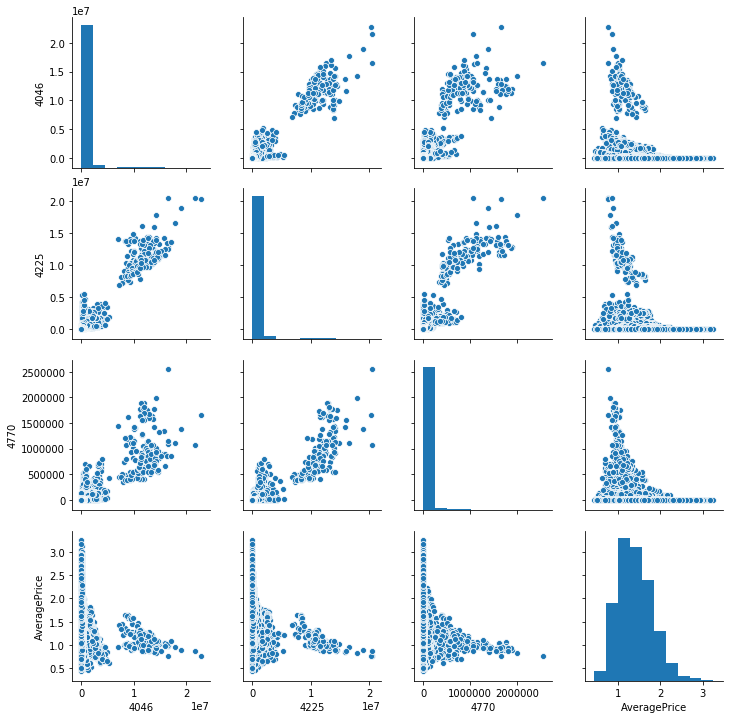

In [108]:
sns_plot = sns.pairplot(
    df[['4046', '4225', '4770','AveragePrice']])
sns_plot

In [62]:
# Выводы: 
# 1. существует прямая корреляция между продажами одного вида авокадо и другими
# (например, выраженная линейная зависимость между продажами 4046 и 4225)
# вероятно, если в торговой точке продается неск. видов, то когда заканчивается наиболее популярный вид, покупатели берут другие виды.
# если же, напр., в торговой точке продается только один вид, то после его продажи, следующая партия может оказаться другого вида и
# покупатели довольствуются имеющимся выбором (возможно, конечно, покупатели вообще не имеют предпочтений по виду авокадо и покупают,
# что есть).
# 2. между ср. ценой и продажами авокадо, судя по цифрам, существует слабая отрицательная корреляция, но видимо, он не линейная.
# визуализация показывает, что есть какая-то ср. цена, которая (плюс-минус) воспринимается покупателями как справедливая,
# и при которой продажи могут достигать максимума, более низкая или более высокая цена ведут к снижению продаж.